In [1]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import kagglehub
import shutil

In [ ]:
def augmentation_image(image_path):
    image_bgr = cv2.imread(image_path)
    augmented = image_bgr.copy()
    h, w = image_bgr.shape[:2]

    # List of possible transformations
    transformations = ['rotate', 'flip', 'shift', 'scale', 'brightness', 'noise']

    # Randomly select at least 3 transformations
    num_transforms = random.randint(3, len(transformations))
    chosen = random.sample(transformations, num_transforms)

    for t in chosen:
        if t == 'flip':
            flip_code = random.choice([-1, 0, 1])  # horizontal, vertical, both
            augmented = cv2.flip(augmented, flip_code)

        elif t == 'shift':
            tx = random.randint(-20, 20)
            ty = random.randint(-20, 20)
            M = np.float32([[1, 0, tx], [0, 1, ty]])
            augmented = cv2.warpAffine(augmented, M, (w, h))

        elif t == 'brightness':
            alpha = random.uniform(0.8, 1.2)  # contrast
            beta = random.randint(-30, 30)    # brightness
            augmented = cv2.convertScaleAbs(augmented, alpha=alpha, beta=beta)

        elif t == 'noise':
            noise = np.random.normal(0, 1, augmented.shape).astype(np.int16)
            augmented = augmented.astype(np.int16) + noise
            augmented = np.clip(augmented, 0, 255).astype(np.uint8)

    return augmented

In [3]:
base_dir = r'/kaggle/input/dataset-augment/Lymphocite'
image_path = base_dir + '/kaggle/input/dataset-augment/Lymphocite/1.JPG'

# Import Dataset & Test

Kích thước ảnh: (640, 640, 3)
Kiểu dữ liệu: uint8


(-0.5, 639.5, 639.5, -0.5)

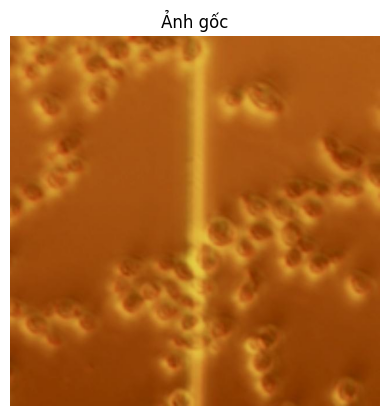

In [ ]:
# Get list of images in test directory
image_files = [f for f in os.listdir(base_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp'))]

# Select first image to test
if not image_files:
    raise FileNotFoundError("No images found in test/ directory")

image_path = os.path.join(base_dir, image_files[1])

# Read original image
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

print(f"Image size: {image_bgr.shape}")
print(f"Data type: {image_bgr.dtype}")

plt.imshow(image_rgb)
plt.title(f"Original Image")
plt.axis("off")

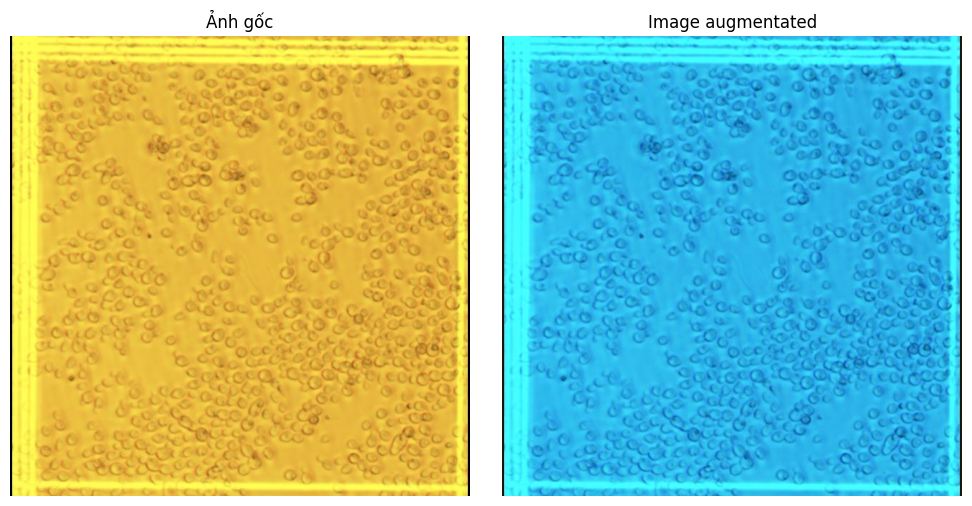

In [ ]:
#augmentation
image_path = os.path.join(base_dir, image_files[0])
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
aug_img = augmentation_image(image_path)

# Hiển thị ảnh gốc
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title(f"Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(aug_img)
plt.title('Image Augmentated')
plt.axis('off')

plt.tight_layout()
plt.show()

# Create augmented image into folder

In [6]:
output_dir = "augmentation_image"
os.makedirs(output_dir, exist_ok=True)

In [7]:
ground_truth_dict = {
    1: 89,
    2: 60,
    3: 60,
    4: 44,
    5: 54,
    6: 68,
    7: 48,
    8: 44,
    9: 52,
    10: 46,
    11: 41,
    12: 58,
    13: 36,
    14: 36,
    15: 46,
    16: 60,
    17: 236,
    18: 258,
    19: 365,
    20: 874,
    21: 913,
    22: 740,
    23: 838,
    24: 422,
    25: 401,
    26: 386,
    27: 319,
    28: 261,
    29: 300,
    30: 300,
    31: 300,
    32: 99,
    33: 43,
    34: 298,
    35: 300,
}

In [ ]:
for img_name in image_files:
    img_path = os.path.join(base_dir, img_name)

    # get the serial number from the file name (remove the .JPG/.jpg part)
    stt = int(os.path.splitext(img_name)[0])

    # look up ground truth in dict
    gt_value = ground_truth_dict[stt]

    # create and save 3 augment images
    for i in range(3):
        aug_img = augmentation_image(img_path)

        base_name = os.path.splitext(img_name)[0]
        save_name = f"{base_name}_GT{gt_value}_aug{i+1}.jpg"
        save_path = os.path.join(output_dir, save_name)
        cv2.imwrite(save_path, aug_img)

print("Augmentation complete, image saved in folder:", output_dir)

Augmentation hoàn tất, ảnh đã lưu trong folder: augmentation_image


In [9]:
#Up load dataset
LOCAL_DATASET_DIR = "/kaggle/working/augmentation_image"

shutil.make_archive("augmentation_image", "zip", LOCAL_DATASET_DIR)

kagglehub.login()

DATASET_SLUG = "lymphocyte-augmentation-final"

kagglehub.dataset_upload(
    handle=f"giahuytranviet/{DATASET_SLUG}",
    local_dataset_dir=LOCAL_DATASET_DIR,
    version_notes="Lymphocite Dataset augmented ."
)

print("Dataset is upload completely on Kaggle Hub.")

Uploading Dataset https://www.kaggle.com/datasets/giahuytranviet/lymphocyte-augmentation-final ...
More than 50 files detected, creating a zip archive...
Starting upload for file /tmp/tmp496sban8/archive.zip


Uploading: 100%|██████████| 7.97M/7.97M [00:01<00:00, 6.11MB/s]

Upload successful: /tmp/tmp496sban8/archive.zip (8MB)


Your dataset has been created.
Files are being processed...
See at: https://www.kaggle.com/datasets/giahuytranviet/lymphocyte-augmentation-final
Dataset is upload completely on Kaggle Hub.
